# Explore the nuScenes Dataset

In [6]:
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from PIL import Image
import matplotlib.pyplot as plt

nusc = NuScenes(version='v1.0-mini', dataroot='../datasets/nuscenes/mini', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.121 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


#### 1. Explore Scenes

In [7]:
# List all scenes
for i, scene in enumerate(nusc.scene):
    print(f"{i}: {scene['name']} — {scene['description']}")

0: scene-0061 — Parked truck, construction, intersection, turn left, following a van
1: scene-0103 — Many peds right, wait for turning car, long bike rack left, cyclist
2: scene-0553 — Wait at intersection, bicycle, large truck, peds crossing crosswalk, ped with stroller
3: scene-0655 — Parking lot, parked cars, jaywalker, bendy bus, gardening vehicles
4: scene-0757 — Arrive at busy intersection, bus, wait at intersection, bicycle, peds
5: scene-0796 — Scooter, peds on sidewalk, bus, cars, truck, fake construction worker, bicycle, cross intersection, car overtaking us
6: scene-0916 — Parking lot, bicycle rack, parked bicycles, bus, many peds, parked scooters, parked motorcycle
7: scene-1077 — Night, big street, bus stop, high speed, construction vehicle
8: scene-1094 — Night, after rain, many peds, PMD, ped with bag, jaywalker, truck, scooter
9: scene-1100 — Night, peds in sidewalk, peds cross crosswalk, scooter, PMD, difficult lighting


#### 2. Access a Scene and its First Sample

In [9]:
# Get the first sample of the first scene
scene = nusc.scene[0]
first_sample_token = scene['first_sample_token']
sample = nusc.get('sample', first_sample_token)

print("Available sensor data:")
for key in sample['data'].keys():
    print(f"  {key}")

Available sensor data:
  RADAR_FRONT
  RADAR_FRONT_LEFT
  RADAR_FRONT_RIGHT
  RADAR_BACK_LEFT
  RADAR_BACK_RIGHT
  LIDAR_TOP
  CAM_FRONT
  CAM_FRONT_RIGHT
  CAM_BACK_RIGHT
  CAM_BACK
  CAM_BACK_LEFT
  CAM_FRONT_LEFT


#### 3. Visualize Camera Image

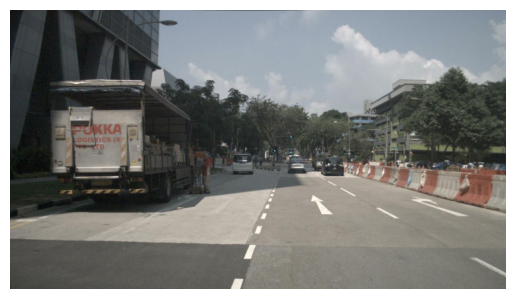

In [11]:
# Show the camera image
cam_token = sample['data']['CAM_FRONT']
cam_data = nusc.get('sample_data', cam_token)
cam_path = f"{nusc.dataroot}/{cam_data['filename']}"

img = Image.open(cam_path)
plt.imshow(img)
plt.axis('off')
plt.show()

#### 4. Visualize LIDAR Point Cloud

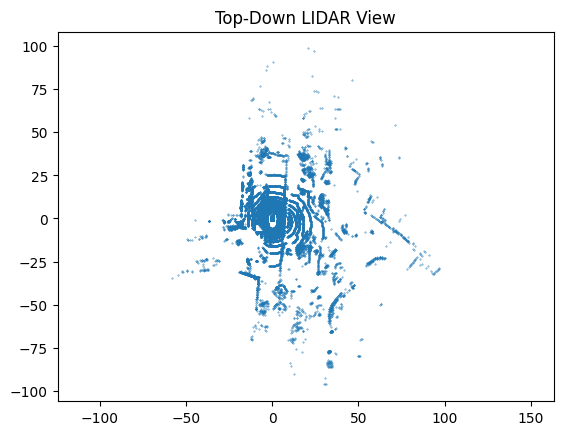

In [12]:
# Show the lidar point cloud
lidar_token = sample['data']['LIDAR_TOP']
lidar_path, boxes, _ = nusc.get_sample_data(lidar_token)
pc = LidarPointCloud.from_file(lidar_path)

points = pc.points[:3, :]  # X, Y, Z

plt.scatter(points[0], points[1], s=0.1)
plt.title("Top-Down LIDAR View")
plt.axis('equal')
plt.show()

#### 5. Explore Annotations

In [13]:
# Explore annotations
for ann_token in sample['anns']:
    ann = nusc.get('sample_annotation', ann_token)
    print(f"Category: {ann['category_name']}, Size: {ann['size']}, Position: {ann['translation']}")

Category: human.pedestrian.adult, Size: [0.621, 0.669, 1.642], Position: [373.256, 1130.419, 0.8]
Category: human.pedestrian.adult, Size: [0.775, 0.769, 1.711], Position: [378.888, 1153.348, 0.865]
Category: vehicle.car, Size: [2.011, 4.633, 1.573], Position: [353.794, 1132.355, 0.602]
Category: human.pedestrian.adult, Size: [0.752, 0.819, 1.637], Position: [376.13, 1158.507, 0.938]
Category: movable_object.trafficcone, Size: [0.427, 0.359, 0.794], Position: [410.066, 1196.767, 0.656]
Category: vehicle.bicycle, Size: [0.689, 1.77, 1.709], Position: [372.664, 1129.247, 0.672]
Category: human.pedestrian.adult, Size: [0.661, 0.703, 1.839], Position: [378.657, 1151.026, 0.833]
Category: vehicle.car, Size: [1.837, 4.32, 1.631], Position: [409.132, 1201.516, 1.01]
Category: human.pedestrian.adult, Size: [0.648, 0.709, 1.609], Position: [396.335, 1122.142, 0.513]
Category: movable_object.barrier, Size: [1.977, 0.703, 1.149], Position: [394.842, 1158.711, 0.487]
Category: movable_object.barrie

#### 6. Traverse Time in a Scene

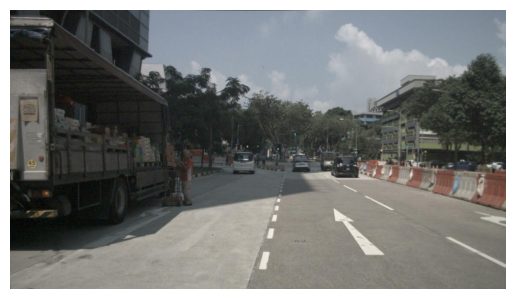

In [14]:
# Traverse time in a scene
next_token = sample['next']
next_sample = nusc.get('sample', next_token)

cam_token = next_sample['data']['CAM_FRONT']
img_path, _, _ = nusc.get_sample_data(cam_token)

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()